## Compare difference between ERA5 and ERA-Interim for ENSO events, based on ONI

### Use the 1x1 grid to make comparison

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import xarray as xr
import cartopy.crs as ccrs
import plot_func as f

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/'

path_remap = '/uio/hume/student-u62/johanmeh/Documents/Master/Data_from_Susann/new_data/remap/'

ds = xr.open_dataset(path + 'FULL-ERA5.monthmean.2007-2018.concat_new.nc')
ds2 = xr.open_dataset(path_remap+ 'erai.tp.monmean.gridera.nc')

In [4]:
era5_trop = ds.sel(lat=slice(-30,30))
erai_trop = ds2.sel(lat=slice(-30,30), time=slice('2006-01-01', '2018-12-31'))

In [5]:
ds2

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 487)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T09:00:00 ... 2019-08-16T09:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    ctpp     (time, lat, lon) float32 ...
    ctpt     (time, lat, lon) float32 ...
    tpp      (time, lat, lon) float32 ...
    tpt      (time, lat, lon) float32 ...
    tpz      (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.6 (http://m...
    Conventions:               CF-1.6
    history:                   Wed Mar 04 19:55:35 2020: cdo remapdis,gridfil...
    title:                     ERA-Interim tropopause pressure, temperature, ...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.9.1 (Homepage = htt...
    CDO:                       Climate Data Operators version 1.9.6 (http://m...

In [6]:
nina07_era5 = era5_trop.sel(time=slice('2007-10-01', '2008-03-01'))
nina10_era5 = era5_trop.sel(time=slice('2010-10-01', '2011-03-01'))
nina17_era5 = era5_trop.sel(time=slice('2017-10-01', '2018-03-01'))

nino09_era5 = era5_trop.sel(time=slice('2009-10-01', '2010-03-01'))
nino15_era5 = era5_trop.sel(time=slice('2015-10-01', '2016-03-01'))

neau_era5 = era5_trop.sel(time=slice('2012-10-01', '2013-03-01'))

In [7]:
nina07_erai = erai_trop.sel(time=slice('2007-10-01', '2008-03-01'))
nina10_erai = erai_trop.sel(time=slice('2010-10-01', '2011-03-01'))
nina17_erai = erai_trop.sel(time=slice('2017-10-01', '2018-03-01'))

nino09_erai = erai_trop.sel(time=slice('2009-10-01', '2010-03-01'))
nino15_erai = erai_trop.sel(time=slice('2015-10-01', '2016-03-01'))

neau_erai = erai_trop.sel(time=slice('2012-10-01', '2013-03-01'))

In [8]:
diff_nina07 = nina07_era5.ctpt[1:4,:,:] - nina07_erai.ctpt[1:4,:,:].values
diff_nina10 = nina10_era5.ctpt[1:4,:,:] - nina10_erai.ctpt[1:4,:,:].values
diff_nina17 = nina17_era5.ctpt[1:4,:,:] - nina17_erai.ctpt[1:4,:,:].values



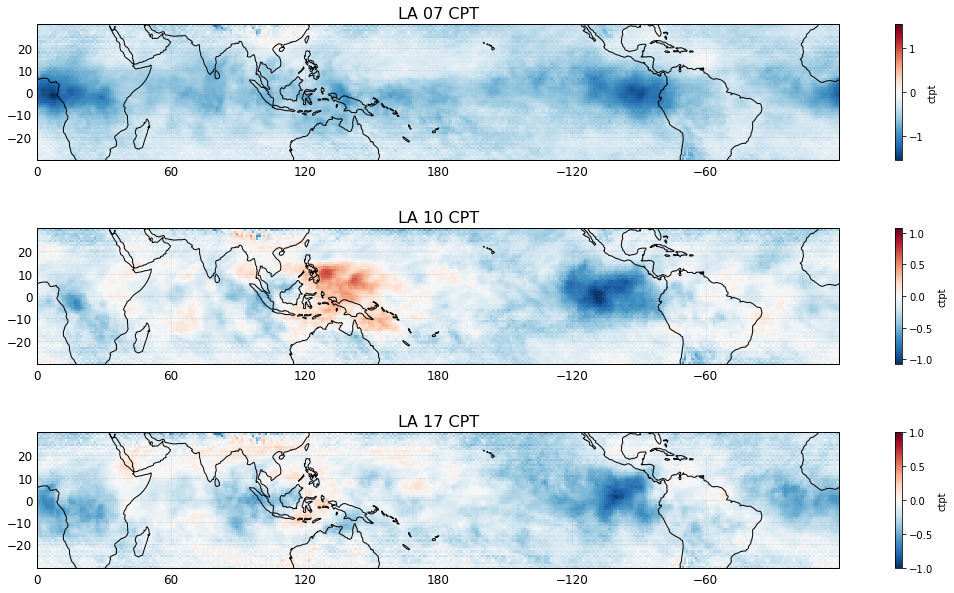

In [11]:
ds1 = diff_nina07.mean(axis=0)
ds2 = diff_nina10.mean(axis=0)
ds3 = diff_nina17.mean(axis=0)
tl1 = 'LA 07 CPT'
tl2 = 'LA 10 CPT'
tl3 = 'LA 17 CPT'
vmin2 = -1
vmax2 = 1

r = f.three_plot(ds1, ds2, ds3, tl1, tl2, tl3, vmin2, vmax2, enso=True)

